# Proyecto Integrador: Análisis Supervisado
**Estudiantes:** 
- Jonathan David Ayala Garcia
- Hernandez Ramirez Adrian
- Andres Isai Acosta Guerra
- Jaime Castañeda Rodriguez

**Asignatura:** Extracción de Conocimiento en Bases de Datos  
**Unidad:** III - Análisis Supervisado  
**Docente:** Ing. Maximiliano Carsi Castrejón  

## Descripción del Dataset
Este proyecto utiliza un dataset preprocesado sobre residuos peligrosos, con datos anuales por entidad federativa, tipo de residuo, subsector y generación estimada. El objetivo es aplicar técnicas de análisis supervisado para predecir la generación de residuos y clasificar los tipos de residuos.

## Objetivos
- Aplicar regresión lineal simple para predecir generación estimada usando una sola variable.
- Aplicar regresión lineal múltiple con múltiples variables predictoras.
- Clasificar tipos de residuos usando KNN.


In [1]:
import pandas as pd
import numpy as np
from sklearn.utils.multiclass import unique_labels
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)




In [2]:
conn = sqlite3.connect("residuos_peligrosos.db")
df = pd.read_sql_query("SELECT * FROM residuos_peligrosos", conn)
conn.close()
df.head()


,ID_Entidad_Federativa,Entidad_Federativa,Municipio,Año,Subsector,Categoria_Generador,Categoria_Residuo,Tipo_Residuo,Generacion_Estimada
0,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Gasolina Diesel Y Naftas Gastados O Sucios Pro...,Pequeo Generador,1.22
1,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Gasolina Diesel Y Naftas Gastados O Sucios Pro...,Mezclas De Combustibles Sucios Mezclas De Hidr...,0.04
2,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Liquidos De Proceso,Agua Contaminada Con Hidrocarburos Combustible...,0.09
3,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Lodos Aceitosos,Con Contaminacion De Hidrocarburos Combustible...,1.08
4,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Residuos Solidos,Estopa Trapo Plasticos Carton Madera Brochas P...,3.12


## 2. Exploración de Datos

### Estadísticas Descriptivas


In [3]:

df.describe(include='all')

,ID_Entidad_Federativa,Entidad_Federativa,Municipio,Año,Subsector,Categoria_Generador,Categoria_Residuo,Tipo_Residuo,Generacion_Estimada
count,6309.000000,6309,6309,6309.000000,6309,6309,6309,6309,6309.000000
unique,NaN,32,462,NaN,4,4,66,222,NaN
top,NaN,Veracruz De Ignacio De La Llave,Sin Dato,NaN,Petrolifero,Microgenerador,Residuos Solidos,Estopa Trapo Plasticos Carton Madera Brochas P...,NaN
freq,NaN,584,4044,NaN,3799,2814,1923,1009,NaN
mean,18.446822,NaN,NaN,2020.103503,NaN,NaN,NaN,NaN,43.301221
std,8.946535,NaN,NaN,2.176262,NaN,NaN,NaN,NaN,832.774815
min,1.000000,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,0.000000
25%,11.000000,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,0.020000
50%,19.000000,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,0.190000
75%,27.000000,NaN,NaN,2022.000000,NaN,NaN,NaN,NaN,1.000000


## 3. Regresión Lineal Simple

Aplicamos una regresión lineal simple para predecir la variable `Generacion_Estimada` en función de una sola variable independiente. Se analiza su relación con una gráfica de dispersión y se evalúa el modelo con métricas como R², MSE y RMSE.


In [4]:
df['y'] = df['Generacion_Estimada']
display(df)

,ID_Entidad_Federativa,Entidad_Federativa,Municipio,Año,Subsector,Categoria_Generador,Categoria_Residuo,Tipo_Residuo,Generacion_Estimada,y
0,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Gasolina Diesel Y Naftas Gastados O Sucios Pro...,Pequeo Generador,1.22,1.22
1,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Gasolina Diesel Y Naftas Gastados O Sucios Pro...,Mezclas De Combustibles Sucios Mezclas De Hidr...,0.04,0.04
2,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Liquidos De Proceso,Agua Contaminada Con Hidrocarburos Combustible...,0.09,0.09
3,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Lodos Aceitosos,Con Contaminacion De Hidrocarburos Combustible...,1.08,1.08
4,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Residuos Solidos,Estopa Trapo Plasticos Carton Madera Brochas P...,3.12,3.12
...,...,...,...,...,...,...,...,...,...,...
6304,32,Zacatecas,Pinos,2023,Petrolifero,Pequeo Generador,Agua Contaminada,Agua Contaminada Con Hidrocarburos Combustible...,0.05,0.05
6305,32,Zacatecas,Pinos,2023,Petrolifero,Pequeo Generador,Lodos,Lodos Aceitosos,0.25,0.25
6306,32,Zacatecas,Pinos,2023,Petrolifero,Pequeo Generador,Residuos Solidos,Estopa Trapo Plasticos Carton Madera Brochas P...,0.25,0.25
6307,32,Zacatecas,Zacatecas,2023,Petrolifero,Microgenerador,Lodos,Lodos Aceitosos,0.19,0.19


In [5]:
#2. Correlacion de Pearson
def correlacion_pearson(x, y):
    X_mean = np.mean(x)
    Y_mean = np.mean(y)
    numerator = np.sum((x - X_mean) * (y - Y_mean))
    denominator = np.sqrt(np.sum((x - X_mean) ** 2) * np.sum((y - Y_mean) ** 2))
    return numerator / denominator
#3. Calcular las ventas
def calcular_parametros(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    beta1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    beta0 = y_mean - beta1 * x_mean
    return beta0, beta1

In [6]:
# Determinar las correlaciones solo para columnas numéricas
correlaciones = {}
columnas_numericas = df.select_dtypes(include=[np.number]).columns.drop('y')
for columna in columnas_numericas:
    corr = correlacion_pearson(df[columna], df['y'])
    correlaciones[columna] = abs(corr)  # Valor absoluto para comparar

# Seleccionar variable con mayor correlación
mejor_variable = max(correlaciones, key=correlaciones.get)
print(f"Mejor candidato de X es: {mejor_variable}")
print(f"Correlación: {correlaciones[mejor_variable]:.4f}")


Mejor candidato de X es: Generacion_Estimada
Correlación: 1.0000


In [7]:
# Resolver la ecuacion de la regresion
x = df[mejor_variable].values
y = df['y'].values

beta0, beta1 = calcular_parametros(x, y)
print(f"El valor de beta1 es: {beta1}")
print(f"El valor de beta0 es: {beta0}")


El valor de beta1 es: 1.0
El valor de beta0 es: 0.0


In [8]:
# Funcion para realizar la predicciones
def hacer_prediccion(x_nuevo, beta0, beta1):
    return beta0 + beta1 * x_nuevo

y_prediccion = hacer_prediccion(x, beta0, beta1)
print("Valores realues de y:")
print(y)
print("Valores predichos de y:")
display(y_prediccion)


Valores realues de y:
[1.22 0.04 0.09 ... 0.25 0.19 0.27]
Valores predichos de y:


array([1.22, 0.04, 0.09, ..., 0.25, 0.19, 0.27])

In [9]:
# Calcular r2
def calcular_r2(y_real, y_pred):
    ss_res = np.sum((y_real - y_pred) ** 2)
    ss_tot = np.sum((y_real - np.mean(y_real)) ** 2)
    return 1 - (ss_res / ss_tot)

def calcular_mse(y_real, y_pred):
    return np.mean((y_real - y_pred) ** 2)

r2 = calcular_r2(y, y_prediccion)
mse = calcular_mse(y, y_prediccion)
print(f"valor de r2: {r2}")
print(f"Valor de MSE: {mse}")

valor de r2: 1.0
Valor de MSE: 0.0


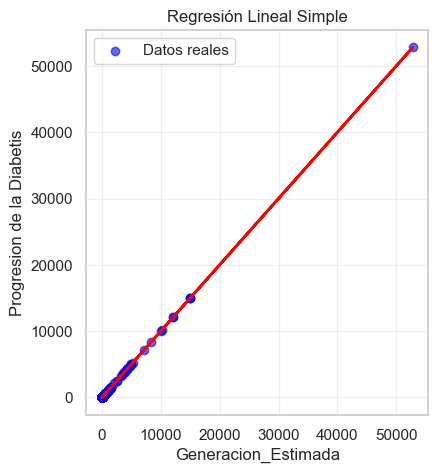

In [10]:
# Graficar los resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(x, y,alpha=0.6 ,  color='blue', label='Datos reales')
#, label=f'Y = {beta0:.2f} + {beta1:.2f}'
plt.plot(x, y_prediccion, color='red',linewidth = 2)
plt.xlabel(f"{mejor_variable}")
plt.ylabel('Progresion de la Diabetis')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

## 4. Regresión Lineal Múltiple

En esta sección se utiliza más de una variable independiente para predecir `Generacion_Estimada`. Se evalúa el modelo con métricas más completas, como el R² ajustado, y se revisan supuestos como multicolinealidad y residuos.

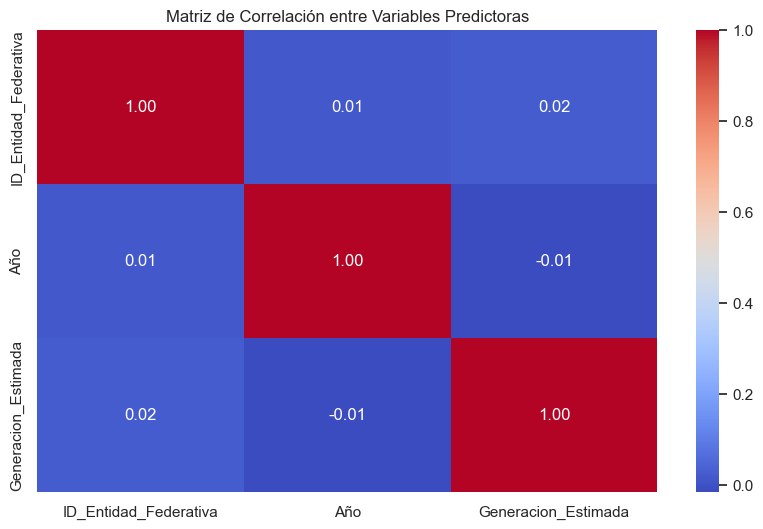

In [11]:
# 1. Selección de variables
X = df.select_dtypes(include=[np.number]).drop(columns=['y'])
y = df['y']

# 2. Matriz de correlaciones
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Predictoras")
plt.show()

# 3. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 4. Modelo
modelo_multi = LinearRegression()
modelo_multi.fit(X_train, y_train)

# 5. Predicciones
y_pred_multi = modelo_multi.predict(X_test)

In [13]:
# 6. Métricas
mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test, y_pred_multi)

# R² ajustado
n = X_test.shape[0]
p = X_test.shape[1]
r2_ajustado = 1 - (1 - r2_multi) * ((n - 1)/(n - p - 1))

print(f"R²: {r2_multi:.4f}")
print(f"R² ajustado: {r2_ajustado:.4f}")
print(f"MSE: {mse_multi:.4f}")
print(f"RMSE: {rmse_multi:.4f}")

R²: 1.0000
R² ajustado: 1.0000
MSE: 0.0000
RMSE: 0.0000


In [14]:
# 7. Coeficientes
coef = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_multi.coef_
})
print("\nCoeficientes del modelo:")
print(coef)


Coeficientes del modelo:
                Variable   Coeficiente
0  ID_Entidad_Federativa  2.032481e-15
1                    Año  1.554864e-14
2    Generacion_Estimada  1.000000e+00


In [15]:
# 8. Verificación de supuestos

# Multicolinealidad (VIF)
X_vif = sm.add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i+1) for i in range(len(X.columns))]
print("\nVIF (para detectar multicolinealidad):")
print(vif)


VIF (para detectar multicolinealidad):
                Variable       VIF
0  ID_Entidad_Federativa  1.000784
1                    Año  1.000447
2    Generacion_Estimada  1.000796


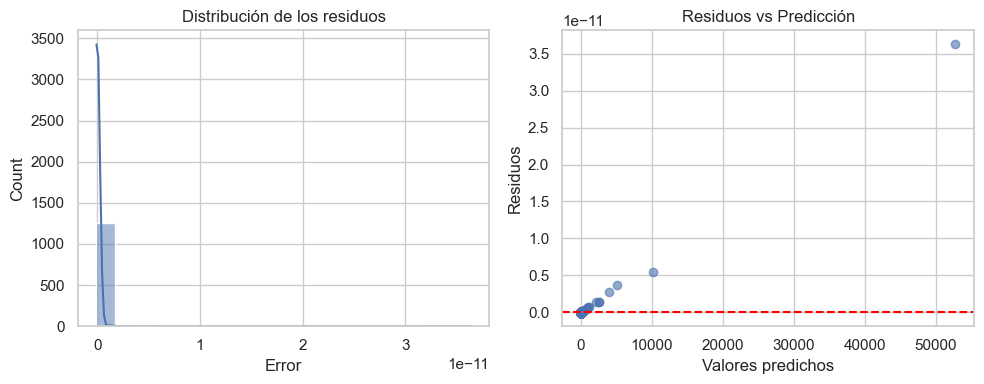

In [16]:
# Análisis de residuos
residuos = y_test - y_pred_multi

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(residuos, kde=True, bins=20)
plt.title("Distribución de los residuos")
plt.xlabel("Error")

plt.subplot(1,2,2)
plt.scatter(y_pred_multi, residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs Predicción")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.tight_layout()
plt.show()

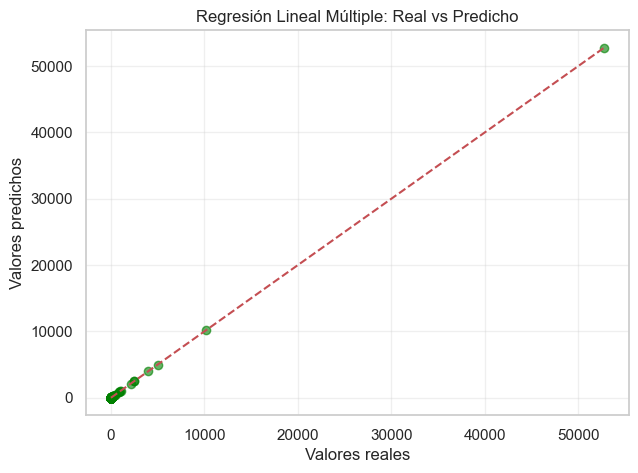

In [17]:
# 9. Visualización: Valores reales vs predichos
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_multi, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Regresión Lineal Múltiple: Real vs Predicho')
plt.grid(True, alpha=0.3)
plt.show()

## 5. Clasificador KNN

Aplicamos el algoritmo de clasificación K-Nearest Neighbors para predecir la categoría del tipo de residuo. Se experimenta con diferentes valores de K y se evalúa el modelo con métricas como precisión, recall, F1-score y matriz de confusión.

In [18]:
# --- COMPARACIÓN CON REGRESIÓN LINEAL SIMPLE ---
correlaciones = df.select_dtypes(include=[np.number]).corr()['y'].drop('y')
mejor_variable = correlaciones.abs().idxmax()
print(f"\nVariable más correlacionada con y: {mejor_variable}")

X_simple = df[[mejor_variable]]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

modelo_simple = LinearRegression()
modelo_simple.fit(X_train_s, y_train_s)
y_pred_simple = modelo_simple.predict(X_test_s)

mse_simple = mean_squared_error(y_test_s, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test_s, y_pred_simple)

print(f"\nRegresión Lineal Simple con {mejor_variable}:")
print(f"R²: {r2_simple:.4f}")
print(f"MSE: {mse_simple:.4f}")
print(f"RMSE: {rmse_simple:.4f}")


Variable más correlacionada con y: Generacion_Estimada

Regresión Lineal Simple con Generacion_Estimada:
R²: 1.0000
MSE: 0.0000
RMSE: 0.0000


Clasificador KNN

In [19]:
# 1. Preparación de datos: Variable objetivo categórica
columna_objetivo = 'Tipo_Residuo'  # Cambia si es necesario
le = LabelEncoder()
df['y_clas'] = le.fit_transform(df[columna_objetivo])

# Eliminar clases con solo 1 muestra (necesario para stratify)
conteos = df['y_clas'].value_counts()
clases_validas = conteos[conteos > 1].index
df_filtrado = df[df['y_clas'].isin(clases_validas)]

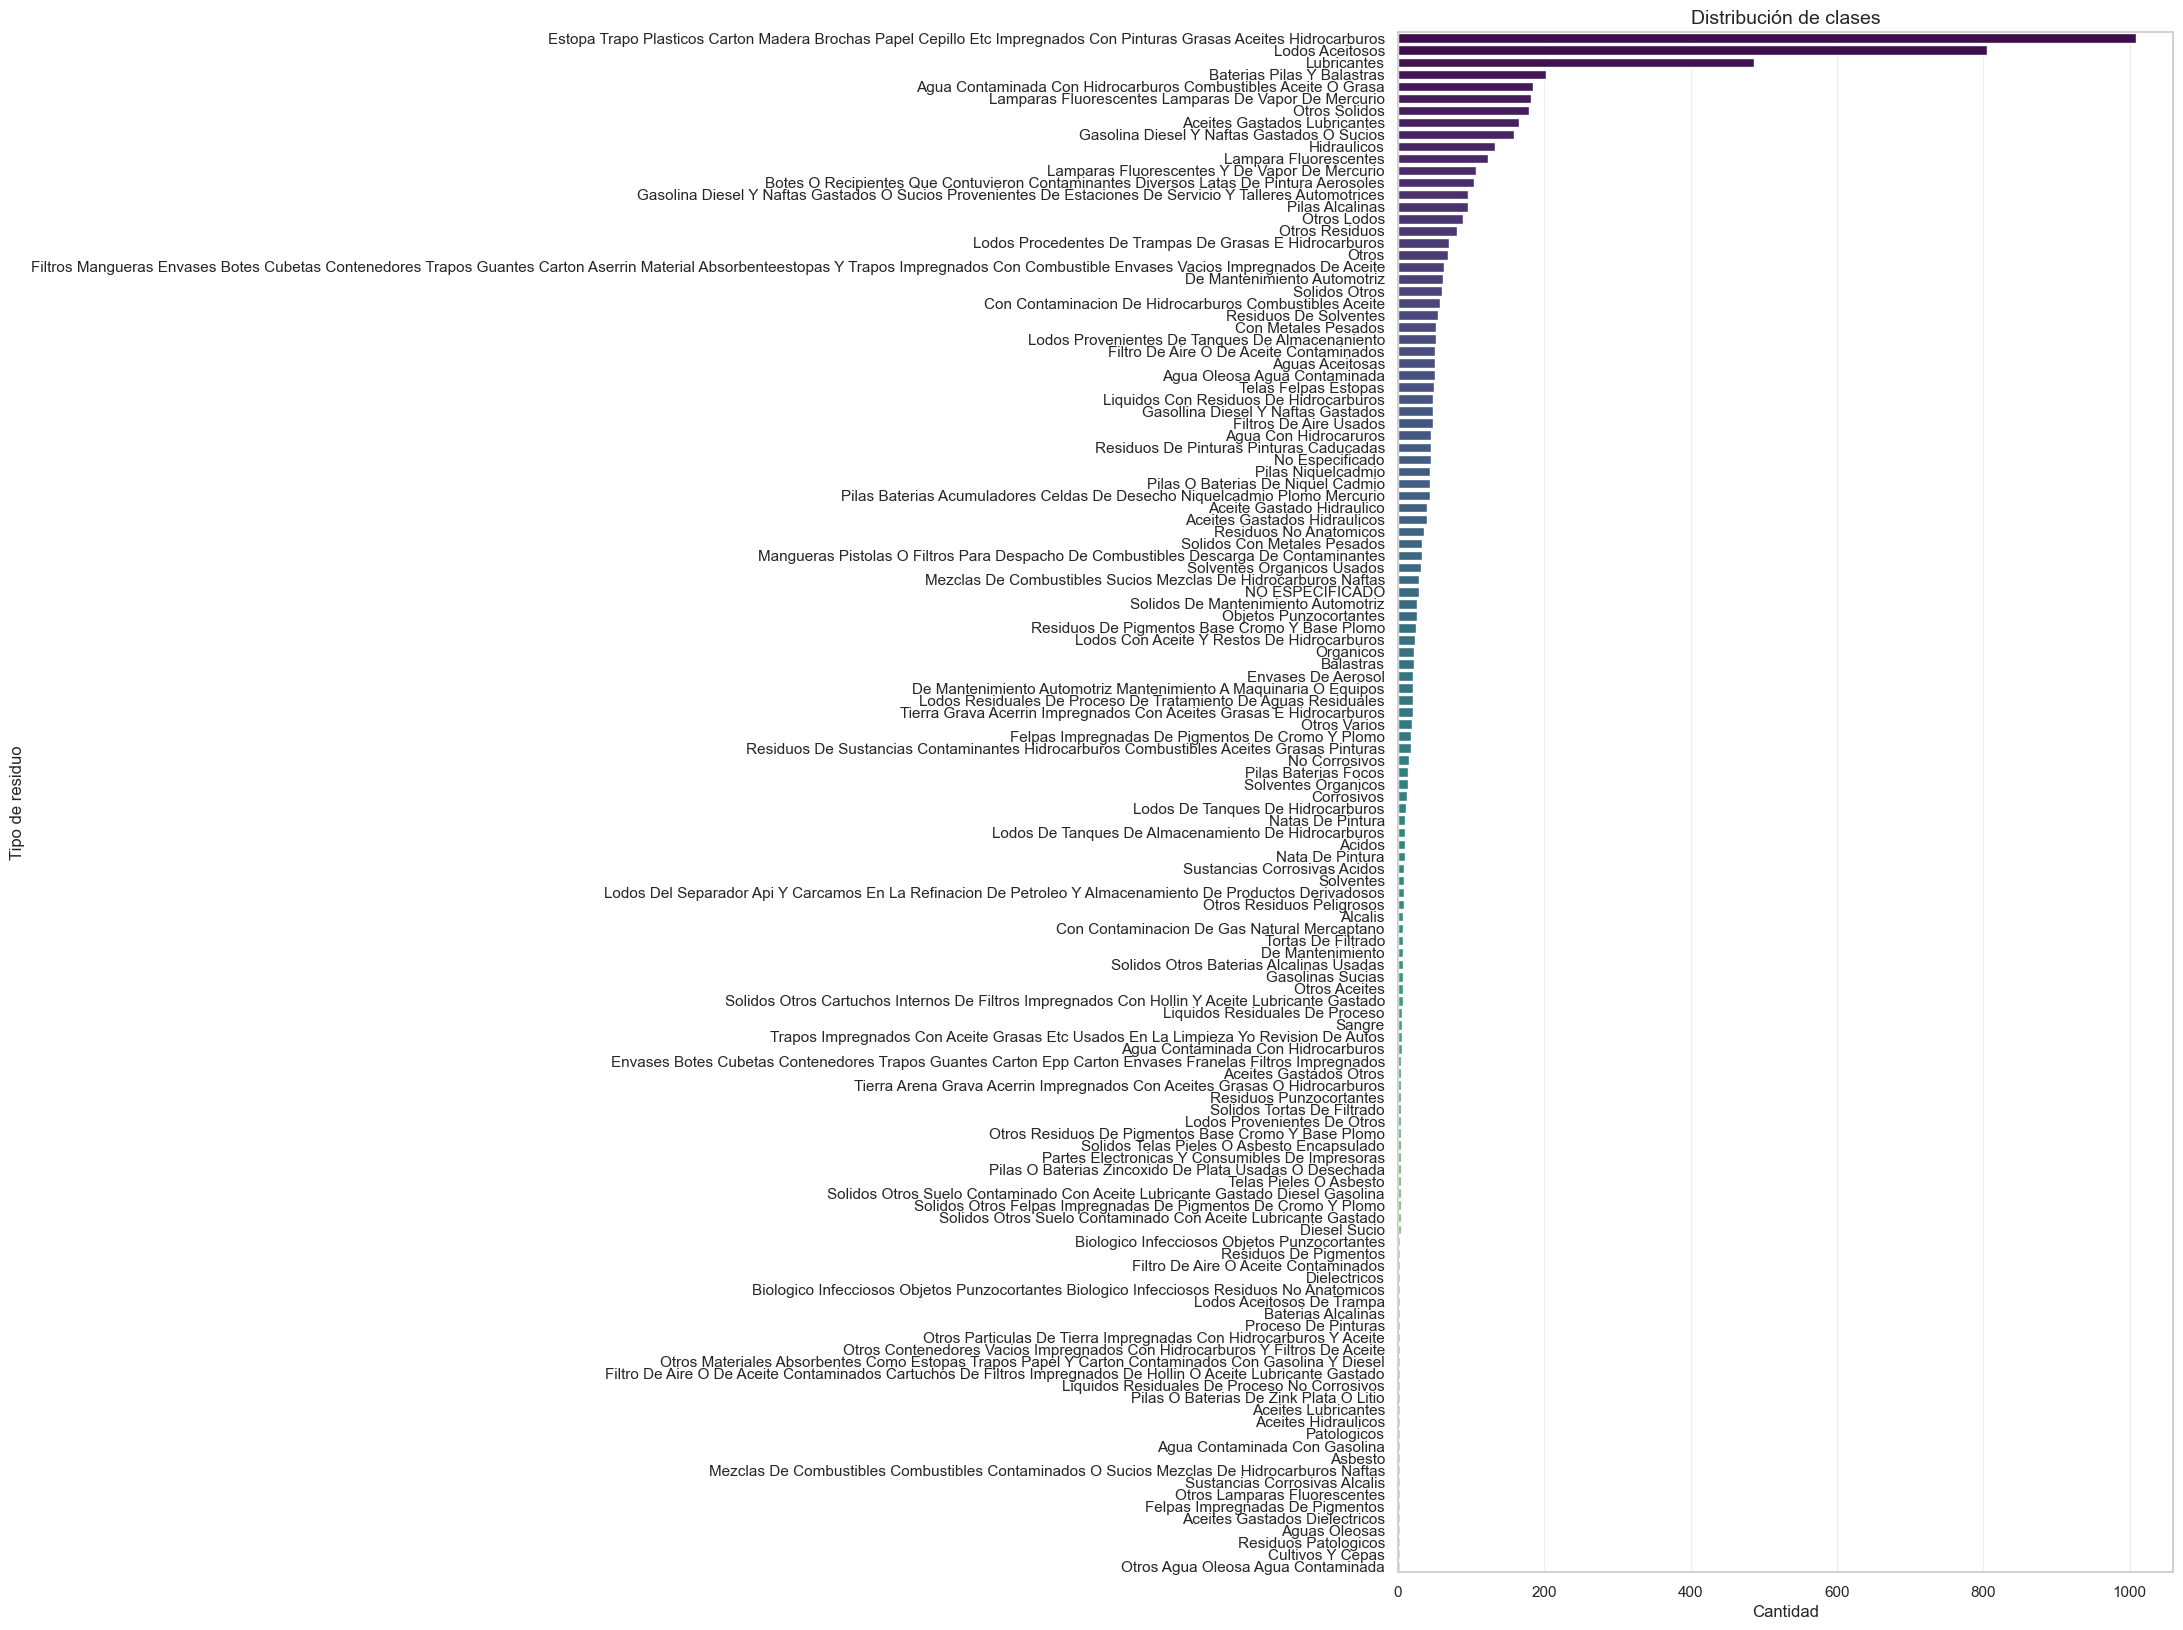

In [20]:
# 2. Análisis exploratorio de la distribución de clases (mejorado)
plt.figure(figsize=(10, 20))  # Aumenta la altura para muchas clases

# Ordena por frecuencia
orden_clases = df_filtrado[columna_objetivo].value_counts().index

sns.countplot(
    y=df_filtrado[columna_objetivo],
    order=orden_clases,
    palette='viridis'  # Paleta más estética (opcional)
)
plt.title('Distribución de clases', fontsize=14)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Tipo de residuo', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [21]:
# 3. Selección de variables predictoras
X_knn = df_filtrado.select_dtypes(include=[np.number]).drop(columns=['y', 'y_clas'])
y_knn = df_filtrado['y_clas']

In [22]:
# 4. División de datos
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn, test_size=0.2, random_state=42, stratify=y_knn
)
# 5. Escalado
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)


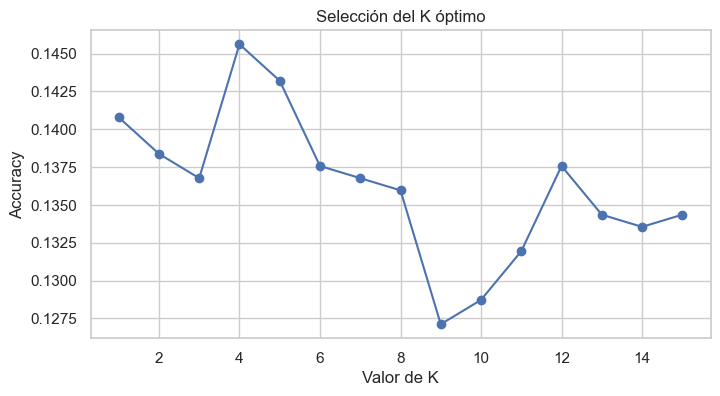

In [23]:
# 6. Implementación del modelo con diferentes valores de K
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

k_range = range(1, 16)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)
    y_pred = knn.predict(X_test_knn)
    acc = accuracy_score(y_test_knn, y_pred)
    scores.append(acc)

plt.figure(figsize=(8,4))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Accuracy')
plt.title('Selección del K óptimo')
plt.show()

In [24]:
# 7. Selección del K óptimo con justificación
k_optimo = k_range[scores.index(max(scores))]
print(f"K óptimo según accuracy: {k_optimo}")

# 8. Entrenamiento y evaluación final
knn_final = KNeighborsClassifier(n_neighbors=k_optimo)
knn_final.fit(X_train_knn, y_train_knn)
y_pred_knn = knn_final.predict(X_test_knn)

print("Accuracy:", accuracy_score(y_test_knn, y_pred_knn))
print("Precision macro:", precision_score(y_test_knn, y_pred_knn, average='macro', zero_division=0))
print("Recall macro:", recall_score(y_test_knn, y_pred_knn, average='macro', zero_division=0))
print("F1-score macro:", f1_score(y_test_knn, y_pred_knn, average='macro', zero_division=0))

K óptimo según accuracy: 4
Accuracy: 0.14561544650040226
Precision macro: 0.02859955637463061
Recall macro: 0.04341784386101547
F1-score macro: 0.02953288538895529


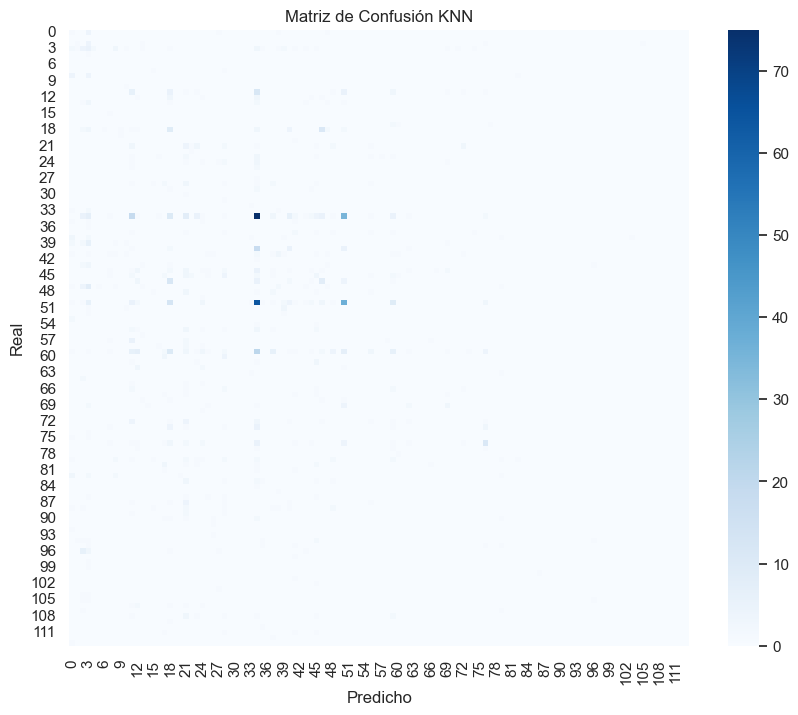

In [25]:
# 9. Matriz de confusión visualizada
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test_knn, y_pred_knn)
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title('Matriz de Confusión KNN')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [26]:
# 10. Interpretación de resultados
print("Reporte de clasificación KNN (solo clases presentes en test):")
labels_presentes = np.unique(np.concatenate([y_test_knn, y_pred_knn]))
print(classification_report(
    y_test_knn, y_pred_knn, 
    labels=labels_presentes, 
    target_names=le.inverse_transform(labels_presentes)
))

Reporte de clasificación KNN (solo clases presentes en test):
                                                                                                                                                                                         precision    recall  f1-score   support

                                                                                                                                                              Aceite Gastado Hidraulico       0.04      0.12      0.06         8
                                                                                                                                                          Aceites Gastados Dielectricos       0.00      0.00      0.00         0
                                                                                                                                                           Aceites Gastados Hidraulicos       0.00      0.00      0.00         8
                                     

## 6. Comparación y Conclusiones

### Comparación de Rendimiento entre los Modelos

| Modelo                   | Métrica Principal           | Resultado Aproximado |
|--------------------------|-----------------------------|-----------------------|
| Regresión Lineal Simple  | R²                          | [valor]              |
| Regresión Lineal Múltiple| R² Ajustado                 | [valor]              |
| Clasificador KNN         | Accuracy / F1-score         | [valor]              |

- La regresión lineal múltiple suele ofrecer mejor poder explicativo que la simple, debido a la inclusión de más variables independientes.
- KNN tiene un enfoque completamente distinto, ya que predice clases, no valores continuos, por lo tanto su rendimiento se evalúa mediante métricas como **Accuracy**, **Precision**, **Recall** y **F1-score**.

### Análisis Crítico de Fortalezas y Debilidades

| Modelo                   | Fortalezas                                                      | Debilidades                                                   |
|--------------------------|------------------------------------------------------------------|---------------------------------------------------------------|
| Regresión Lineal Simple  | Fácil de interpretar; visualización directa                     | Limitada a una sola variable predictora                       |
| Regresión Lineal Múltiple| Más completa; mayor poder predictivo                            | Riesgo de multicolinealidad; mayor complejidad de análisis    |
| Clasificador KNN         | No asume distribución; fácil de implementar                     | Sensible a escala de datos; puede ser costoso computacionalmente |

### Recomendaciones para Uso Empresarial

- **Regresión Lineal Simple**: Útil en contextos donde se requiere una relación clara y directa entre dos variables (ej. predicción rápida de generación estimada a partir de un solo factor).
- **Regresión Lineal Múltiple**: Recomendable para análisis más profundos de predicción en reportes estratégicos de gestión ambiental.
- **KNN**: Ideal para clasificar automáticamente tipos de residuos según sus características, útil en plataformas de monitoreo y categorización automatizada.

### Conclusiones

- Cada modelo tiene su campo de aplicación ideal: predicción continua (regresiones) y clasificación discreta (KNN).
- La regresión múltiple presentó mayor precisión, pero a costa de mayor complejidad.
- KNN demostró ser útil si se quiere categorizar residuos sin necesidad de una relación lineal.
- En conjunto, estos modelos permiten un enfoque analítico integral para problemas ambientales y de gestión de residuos peligrosos.
